# Lab 5: Solving Linear Systems

The goal of the lab is to solve
$$Ax=b$$
For that we will use following functions
* [scipy.lingal.inv](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.inv.html) this one solve the system using $x=A^{-1}b$
* [scipy.lingal.lu_factor](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu_factor.html#scipy.linalg.lu_factor) this one compute the $PLU$ factorization of $A$
* [scipy.lingal.lu_solve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu_solve.html) this one solve $PLUx=b$
* [scipy.lingal.solve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html) this one solve directly $Ax=b$

In [ ]:
# IMPORTS
import scipy.linalg as spl
from scipy.linalg import lu, lu_factor, lu_solve
import numpy as np
import matplotlib.pyplot as plt
import timeit


### Exercise 1

Test the different solvers with a system you know the answer of
* Invert $A$ with **scipy.linalg.inv()**  and left-multiply the inverse to **b**.
* Use **scipy.linalg.solve()**.
* Use **scipy.linalg.lu_factor()** and **scipy.linalg.lu_solve()** to solve the system with the LU decomposition.

In [ ]:
#Creation of system (matrix A) and solutions (array X)
A = np.zeros((3,3), 'd')
A[0,0] = 2
A[0,1] = 1
A[0,2] = 5
A[1,0] = 1
A[1,1] = -1
A[1,2] = 3
A[2,0] = 4
A[2,1] = 2
A[2,2] = 7
#print(A)

x = np.array([12, 4, 6])
print("Matrix A:", A)
print("Choice of x values:", x)

Matrix A: [[ 2.  1.  5.]
 [ 1. -1.  3.]
 [ 4.  2.  7.]]
Choice of x values: [12  4  6]


In [ ]:
#Finding b:
b = (A.dot(x))
#b
print("The solutions associated with matrix A and the chosen x values is:", b)

The solutions associated with matrix A and the chosen x values is: [58. 26. 98.]


In [ ]:
#Testing method 1
Ainv = spl.inv(A)
Ainv
#u = Ainv.dot(b)
#u
u = Ainv.dot(b)
print("Testing inverse A method: the solution produced by this method is:", u)
print( "These are the solutions we initially chose, indicating this method is working.")

Testing inverse A method: the solution produced by this method is: [12.  4.  6.]
These are the solutions we initially chose, indicating this method is working.


In [ ]:
#Testing method 2
LU, P = spl.lu_factor(A)
print("Testing LU decomposition method: the solution produced by this method is:", spl.lu_solve((LU,P), b))
print( "These are the solutions we initially chose, indicating this method is working.")

Testing LU decomposition method: the solution produced by this method is: [12.  4.  6.]
These are the solutions we initially chose, indicating this method is working.


In [ ]:
#Testing method 3:
x = spl.solve(A, b)
print("Testing spl.solve method: the solution produced by this method is:",x)
print( "These are the solutions we initially chose, indicating this method is working.")

Testing spl.solve method: the solution produced by this method is: [12.  4.  6.]
These are the solutions we initially chose, indicating this method is working.


## Exercise 2

Write a function that times different **scipy.linalg** functions for solving square linear systems.

For various values of $n$, generate a random $n \times n$ matrix $A$ and a random $n$-vector $b$ using **np.random.random()**.
Time how long it takes to solve the system $Ax = b$ with each of the following approaches:

* Invert $A$ with **scipy.linalg.inv()**  and left-multiply the inverse to **b**.
* Use **scipy.linalg.solve()**.
* Use **scipy.linalg.lu_factor()** and **scipy.linalg.lu_solve()** to solve the system with the LU decomposition.
* Use **scipy.linalg.lu_factor()** and **scipy.linalg.lu_solve()**, but only time **scipy.linalg.lu_solve()** (not the time it takes to do the factorization with **scipy.linalga.lu_factor()**).

Plot the system size $n$ versus the execution times. (to time a code use **time.time()** and to create a random matrix use **np.random.random((n,n))**)

**What can you conclude?**

In [ ]:
A1 =np.random.random((100, 100))
#print(A1)
b1 = np.random.random(100)
#print(b1)
A2 = np.random.random((1000, 1000))
b2 = np.random.random(1000)
A3 = np.random.random((2000,2000))
b3 = np.random.random(2000)

In [ ]:
#First array, first method
t1 = time.time()
A1inv = spl.inv(A1)
u1 = A1inv.dot(b1)
t1 = time.time()-t1
print("Execution time to invert A (100x100) and left-multiply with b:",t1)#this should be the longest method

Execution time to invert A (100x100) and left-multiply with b: 0.07819199562072754


In [ ]:
#First array, second method
t2 = time.time()
LU, P = spl.lu_factor(A1)
spl.lu_solve((LU,P), b1)
t2 = time.time() - t2
print("Execution time for LU decomposition method:",t2)

Execution time for LU decomposition method: 0.06768226623535156


In [ ]:
#First array: factor
t4 = time.time()
LU, P = spl.lu_factor(A1)
t4 = time.time() - t4
print("Execution time to solely factor A (100x100):", t4)#this should be the fastest method

Execution time to solely factor A (100x100): 0.042067766189575195


In [ ]:
#First array, third method
t3 = time.time()
x = spl.solve(A1, b1)
t3 = time.time() -t3
print("Execution time to use spl.solve method:", t3)

Execution time to use spl.solve method: 0.04538607597351074


In [ ]:
#Second array, first method
v1 = time.time()
A2inv = spl.inv(A2)
u2 = A2inv.dot(b2)
v1 = time.time()-v1
print("Execution time to invert A (1000x1000) and left-multiply with b:", v1)

Execution time to invert A (1000x1000) and left-multiply with b: 0.26131629943847656


In [ ]:
#Second array, second method
v2 = time.time()
LU, P = spl.lu_factor(A2)
spl.lu_solve((LU,P), b2)
v2 = time.time() - v2
print("Execution time for LU decomposition method:", v2)

Execution time for LU decomposition method: 0.2667720317840576


In [ ]:
#Second array: factor
v4 = time.time()
LU, P = spl.lu_factor(A2)
v4 = time.time() - v4
print("Execution time to solely factor A (1000x1000):", v4)

Execution time to solely factor A (1000x1000): 0.1905837059020996


In [ ]:
#Second array, third method
v3 = time.time()
x = spl.solve(A2, b2)
v3 = time.time() - v3
print("Execution time to use spl.solve method:", v3)

Execution time to use spl.solve method: 0.16781353950500488


In [ ]:
#Third array, first method
w1 = time.time()
A3inv = spl.inv(A3)
u3 = A3inv.dot(b3)
w1 = time.time()- w1
print("Execution time to invert A (2000x2000) and left-multiply with b:", w1)

Execution time to invert A (2000x2000) and left-multiply with b: 0.4261806011199951


In [ ]:
#Third array, second method
w2 = time.time()
LU, P = spl.lu_factor(A3)
spl.lu_solve((LU,P), b3)
w2 = time.time() - w2
print("Execution time for LU decomposition method:", w2)

Execution time for LU decomposition method: 0.20423388481140137


In [ ]:
#Third array: factor
w4 = time.time()
LU, P = spl.lu_factor(A3)
w4 = time.time() - w4
print("Execution time to solely factor A (2000x2000):", w4)

Execution time to solely factor A (2000x2000): 0.2277834415435791


In [ ]:
#Third array, third method
w3 = time.time()
x = spl.solve(A3, b3)
w3 = time.time() - w3
print("Execution time to use spl.solve method:", w3)

Execution time to use spl.solve method: 0.1954789161682129


Text(0.5, 1.0, 'Execution Times vs Matrix Size')

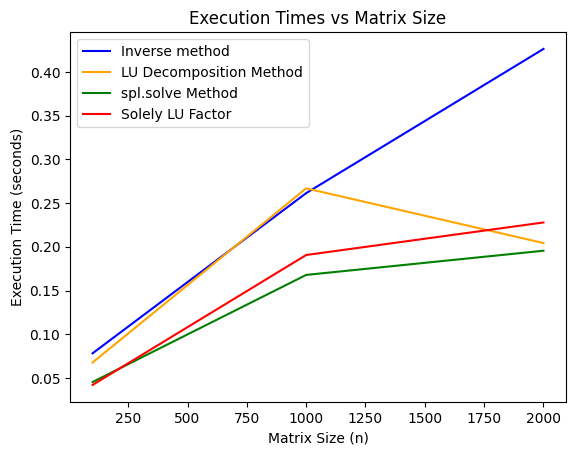

In [ ]:
x = np.array([100, 1000, 2000])
method1 = np.array([t1, v1, w1])
method2 = np.array([t2, v2, w2])
factormethod = np.array([t4, v4, w4])
method3 = np.array([t3, v3, w3])

plt.plot(x, method1, color = "blue")
plt.plot(x, method2, color = "orange")
plt.plot(x, method3, color = "green")
plt.plot(x, factormethod, color = "red")
plt.legend(["Inverse method", "LU Decomposition Method", "spl.solve Method", "Solely LU Factor"])
plt.xlabel("Matrix Size (n)")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Times vs Matrix Size")

In [ ]:
import timeit
import numpy as np
import scipy.linalg as spl
import matplotlib.pyplot as plt

# Define the array sizes
n_values = [10, 100, 1000, 2000, 4000]

# Define the methods to time
methods = [
    ('Inverse method', lambda A, b: spl.inv(A) @ b), # @ is same as .dot()
    ('LU decomposition method', lambda A, b: spl.lu_solve(spl.lu_factor(A), b)),
    ('spl.solve method', lambda A, b: spl.solve(A, b)),
    ('Solely LU factor', lambda A, b: spl.lu_factor(A))
]

# Time each method for each array size
times = [[] for _ in methods]
for n in n_values:
    A = np.random.random((n, n))
    b = np.random.random(n)
    for i, (name, method) in enumerate(methods):
        t = timeit.timeit(lambda: method(A, b), number=10)
        times[i].append(t)

# Plot the execution times
plt.figure(figsize=(10, 6))
for name, timings in zip(methods, times):
    plt.plot(n_values, timings, '-o', label=name[0])
plt.xlabel('System size n')
plt.ylabel('Execution time (s)')
plt.legend()
plt.show()


KeyboardInterrupt: 

In [ ]:
print("""
After testing each of the methods with matrices of varying sizes, I can conclude that as the size of the matrix increases,
solely factoring the matrix is executed fastest, and solving the matrix by inverting A takes the longest amount of time.
For each of the four functions, as the size of the matrix increases, the execution time increases.
""")


After testing each of the methods with matrices of varying sizes, I can conclude that as the size of the matrix increases,
solely factoring the matrix is executed fastest, and solving the matrix by inverting A takes the longest amount of time.
For each of the four functions, as the size of the matrix increases, the execution time increases.



### Exercise 3

 Solve the systems
1. $\begin{cases}
  2x_1-x_2+x_3 &= 7\\
  4x_1-2x_2+x_3&=3\\
  x_1+2x_2+4x_3 &= 11\\
  \end{cases}$

2. $\begin{cases}
  \frac{5}{3}x_1+\frac{2}{3}x_2+\frac{2}{3}x_3 &= 7\\
  2x_1+x_2+4x_3 &=-8\\
  -x_1+4x_2+x_3&=5\\
  \end{cases}$
  
3. $\begin{cases}
  5x_1+2x_2+3x_3-x_4 &= 2\\
  x_1+2x_2+x_4 &=-1\\
  3x_1-x_2-3x_3+2x_4 &= 3\\
  2x_1+x_3+x_4 &= 2\\
  \end{cases}$
 

4. $\begin{cases}
  2x_1+x_2 &=1\\
  -x_1+2x_2+x_3 &= -2\\
  -x_2+2x_3+x_4 &= -2\\
  -x_3+2x_4+x_5 & =1.3 \\
  -x_4+2x_5 &= 0.4\end{cases}$

In [ ]:
#Number 1:
A = np.zeros((3,3), 'd')
A[0,0] = 2
A[0,1] = -1
A[0,2] = 1
A[1,0] = 4
A[1,1] = -2
A[1,2] = 1
A[2,0] = 1
A[2,1] = 2
A[2,2] = 4
#A
b = np.array([7, 3, 11])
#b

In [1]:
from scipy.linalg import inv, solve, lu_factor, lu_solve

import numpy as np


# Creating system (matrix A) and solutions (array X)

A = np.array([[7, -2, 1, -3], [-5, 10, -2, 1],
             [-2, 0, 8, 1], [0, 4, 1, 5]], dtype=float)

b = np.array([-37, 27, 11, 39], dtype=float)


x = solve(A, b)


In [2]:
x

array([-2.0000000e+00,  1.0000000e+00,  1.3087995e-17,  7.0000000e+00])

In [6]:
A @ x

array([-37.,  27.,  11.,  39.])

In [20]:
b

array([ 18.8, -56. , -14.8])

In [ ]:
4*u[1]_

In [21]:
u

array([  1. ,  -1.2, -10. ])

In [18]:
Ainv = spl.inv(A)
#Ainv
u = Ainv.dot(b)
print("The solution after inverting A  is:", u)

The solution after inverting A  is: [  1.   -1.2 -10. ]


In [22]:
#Checking it is correct:
print(np.dot(A, u), b)#we are correct because these match

[ 18.8 -56.  -14.8] [ 18.8 -56.  -14.8]


In [19]:
#option 1 for error: 
#np.max(np.abs(np.dot(A, u) -b))

3.552713678800501e-15

In [18]:
#option 2 for error:
print("The error associated with the inverting A method is:", np.sqrt(np.sum(np.dot(A, u) -b)**2)/len(b))

1.7763568394002505e-15

In [78]:
#Number 1: Method 2:
LU, P = spl.lu_factor(A)
print("The solution after using LU factorization is:", spl.lu_solve((LU, P), b))

The solution after using P, L, and U factorization is: [ -8.2 -12.4  11. ]


In [23]:
#Number 1: Method 3:
A = np.array([[0, 1, -2, 0], [4, 1, 1, 6],
             [1, 0, 0, 3], [0, 1, 6, 0]], dtype=float)

b = np.array([7, 63, 29, -25], dtype=float)
x = spl.solve(A, b)
print("The solution after using spl.solve is:",x)

The solution after using spl.solve is: [ 5. -1. -4.  8.]


In [29]:
assert np.allclose(A @ x, b), "Method 1 produced incorrect solution"

In [23]:
print("Error associated with spl.solve method:", spl.norm(A.dot(x) -b))

Error associated with spl.solve method: 3.972054645195637e-15


In [24]:
#Number 2:
A = np.zeros((3,3), 'd')
A[0,0] = 5/3
A[0,1] = 2/3
A[0,2] = 2/3
A[1,0] = 2
A[1,1] = -1
A[1,2] = 4
A[2,0] = -1
A[2,1] = 4
A[2,2] = 1
#A
b = np.array([7, -8, 5])
#b

In [103]:
Ainv = spl.inv(A)
#Ainv
u = Ainv.dot(b)
print("The solution after inverting A  is:",u)

The solution after inverting A  is: [ 4.27710843  3.15662651 -3.34939759]


In [90]:
#Checking it is correct:
print(np.dot(A, u), b)

[ 7. -8.  5.] [ 7 -8  5]


In [91]:
#option 1 for error: 
#np.max(np.abs(np.dot(A, u) -b))

2.6645352591003757e-15

In [92]:
#option 2 for error:
print("The error associated with the inverting A method is:", np.sqrt(np.sum(np.dot(A, u) -b)**2)/len(b))

8.881784197001252e-16

In [104]:
#Number 2: Method 2:
LU, P = spl.lu_factor(A)
print("The solution after using LU factorization is:", spl.lu_solve((LU, P), b))

The solution after using P, L, and U factorization is: [ 4.27710843  3.15662651 -3.34939759]


In [25]:
#Number 2: Method 3:
x = spl.solve(A, b)
print("The solution after using spl.solve is:", x)

The solution after using spl.solve is: [ 4.27710843  3.15662651 -3.34939759]


In [26]:
print("Error associated with spl.solve method:", spl.norm(A.dot(x) -b))

Error associated with spl.solve method: 1.9860273225978185e-15


In [27]:
#Number 3:
A = np.zeros((4,4), 'd')
A[0,0] = 5
A[0,1] = 2
A[0,2] = 3
A[0,3] = -1
A[1,0] = 1
A[1,1] = 2
A[1,2] = 0
A[1,3] = 1
A[2,0] = 3
A[2,1] = -1
A[2,2] = -3
A[2,3] = 2
A[3,0] = 2
A[3,1] = 0
A[3,2] = 1
A[3,3] = 1
#A
b = np.array([2, -1, 3, 2])
#b

In [101]:
Ainv = spl.inv(A)
#Ainv
u = Ainv.dot(b)
print("The solution after inverting A  is:", u)

The solution after inverting A  is: [ 0.71232877 -1.01369863  0.26027397  0.31506849]


In [96]:
#Checking it is correct:
print(np.dot(A, u), b)

[ 2. -1.  3.  2.] [ 2 -1  3  2]


In [ ]:
#option 2 for error:
print("The error associated with the inverting A method is:", np.sqrt(np.sum(np.dot(A, u) -b)**2)/len(b))

In [100]:
#Number 3: Method 2
LU, P = spl.lu_factor(A)
print("The solution after using LU factorization is:", spl.lu_solve((LU,P), b))

The solution after using P, L, and U factorization is: [ 0.71232877 -1.01369863  0.26027397  0.31506849]


In [28]:
#Number 3: Method 3
x = spl.solve(A, b)
print("The solution after using spl.solve is:", x)

The solution after using spl.solve is: [ 0.71232877 -1.01369863  0.26027397  0.31506849]


In [29]:
print("Error associated with spl.solve method:", spl.norm(A.dot(x) -b))

Error associated with spl.solve method: 1.137640067256873e-15


In [30]:
#Number 4:
A = np.zeros((5,5), 'd')
A[0,0] = 2
A[0,1] = 1
A[0,2] = 0
A[0,3] = 0
A[0,4] = 0
A[1,0] = -1
A[1,1] = 2
A[1,2] = 1
A[1,3] = 0
A[1,4] = 0
A[2,0] = 0
A[2,1] = -1
A[2,2] = 2
A[2,3] = 1
A[2,4] = 0
A[3,0] = 0
A[3,1] = 0
A[3,2] = -1
A[3,3] = 2
A[3,4] = 1
A[4,0] = 0
A[4,1] = 0
A[4,2] = 0
A[4,3] = -1
A[4,4] = 2

b = np.array([1, -2, -2, 1.3, 0.4])

In [115]:
#Number 4: First method:
Ainv = spl.inv(A)
u = Ainv.dot(b)
print("The solution after inverting A  is:", u)

The solution after inverting A  is: [ 0.58285714 -0.16571429 -1.08571429  0.00571429  0.20285714]


In [111]:
#Checking we are correct:
print(np.dot(A, u), b)

[ 1.  -2.  -2.   1.3  0.4] [ 1.  -2.  -2.   1.3  0.4]


In [ ]:
#option 2 for error:
print("The error associated with the inverting A method is:", np.sqrt(np.sum(np.dot(A, u) -b)**2)/len(b))

In [114]:
#Number 4: Second method
LU, P = spl.lu_factor(A)
print("The solution after using LU factorization is:",spl.lu_solve((LU,P), b))

The solution after using P, L, and U factorization is: [ 0.58285714 -0.16571429 -1.08571429  0.00571429  0.20285714]


In [31]:
#Number 4: Method 3
x = spl.solve(A, b)
print("The solution after using spl.solve is:", x)

The solution after using spl.solve is: [ 0.58285714 -0.16571429 -1.08571429  0.00571429  0.20285714]


In [32]:
print("Error associated with spl.solve method:", spl.norm(A.dot(x) -b))

Error associated with spl.solve method: 4.440892098500626e-16


### Exercise 4

Solve the tridiagonal system $Ax=f$ with
$$ A_{ii}=4,\enspace A_{i,i-1}=A_{i,i+1}=1 $$
for all $i$. Let the order of the system be $n=100$, and let
$$ f = [1,1,\dots, 1]^T $$

In [ ]:
#matrix that looks like: [4, 1, 0,...,], [1, 4, 1, 0, 0, ...], [0,1,4,1,0,0,...], [0,0,1,4,1,0,0,...]

In [2]:
from scipy.sparse import diags
import numpy as np

n = 100
k = [np.ones(n-1),4*np.ones(n),np.ones(n-1)]
offset = [-1,0,1]
A = diags(k,offset).toarray()
A

array([[4., 1., 0., ..., 0., 0., 0.],
       [1., 4., 1., ..., 0., 0., 0.],
       [0., 1., 4., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 4., 1., 0.],
       [0., 0., 0., ..., 1., 4., 1.],
       [0., 0., 0., ..., 0., 1., 4.]])

In [8]:
f = np.full(100, 1)
f

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
Ainv = spl.inv(A)
#Ainv

In [11]:
#Method 1:
u = Ainv.dot(f)
print("The solution after inverting A is:", u)

The solution after inverting A is: [0.21132487 0.15470054 0.16987298 0.16580754 0.16689687 0.16660498
 0.16668319 0.16666224 0.16666785 0.16666635 0.16666675 0.16666664
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16

In [12]:
#Method 2:
LU, P = spl.lu_factor(A)
print("The solution after using PLU decomposition is:", spl.lu_solve((LU,P), f))

The solution after using PLU decomposition is: [0.21132487 0.15470054 0.16987298 0.16580754 0.16689687 0.16660498
 0.16668319 0.16666224 0.16666785 0.16666635 0.16666675 0.16666664
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.1

In [13]:
#Method 3:
x = spl.solve(A, f)
print("The solution after using spl.solve method is:", x)

The solution after using spl.solve method is: [0.21132487 0.15470054 0.16987298 0.16580754 0.16689687 0.16660498
 0.16668319 0.16666224 0.16666785 0.16666635 0.16666675 0.16666664
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16